## Import Pustaka

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


Bagian ini mengimpor pustaka yang akan digunakan dalam analisis sentimen. `pandas` dan `numpy` untuk manipulasi data, `train_test_split` untuk membagi dataset, `CountVectorizer` dan `TfidfVectorizer` untuk ekstraksi fitur, `MultinomialNB` untuk model Naive Bayes, serta `accuracy_score`, `confusion_matrix`, dan `classification_report` untuk evaluasi model. `matplotlib` dan `seaborn` digunakan untuk visualisasi, sedangkan `nltk` untuk pemrosesan teks.

## Muat Dataset

In [3]:

df = pd.read_csv('dataset/sentiment140.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = df[['target', 'text']]
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)


Bagian ini memuat dataset dari file CSV, mengatur kolom-kolomnya, dan hanya menyimpan kolom yang relevan (`target` dan `text`). Nilai `target` diubah menjadi 1 untuk sentimen positif (nilai asli 4) dan 0 untuk sentimen negatif (nilai asli 0).

## Pra-pemrosesan Data

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df['text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anggitwirasto/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anggitwirasto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Bagian ini melakukan pra-pemrosesan teks dengan mengunduh stopwords, mengubah teks menjadi huruf kecil, menghapus URL dan karakter non-alfabet, serta menghapus stopwords menggunakan `nltk`.

## Pemisahan Data Latih dan Uji

In [5]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Bagian ini membagi dataset menjadi fitur (`X`) dan target (`y`), kemudian membagi dataset menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split`.

## Ekstraksi Fitur

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


Bagian ini menggunakan `TfidfVectorizer` untuk mengubah teks menjadi fitur-fitur numerik yang dapat digunakan oleh model machine learning. `max_features=5000` membatasi jumlah fitur maksimum menjadi 5000.

## Pembuatan Model

In [7]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)


MultinomialNB()

Bagian ini membuat model Naive Bayes (`MultinomialNB`) dan melatihnya menggunakan data latih yang telah diekstraksi fitur-fiturnya.

## Evaluasi Model

In [8]:
y_pred = model.predict(X_test_vect)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75764375
Confusion Matrix:
 [[122293  37201]
 [ 40353 120153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76    159494
           1       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



Bagian ini memprediksi sentimen pada data uji menggunakan model yang telah dilatih, kemudian mengevaluasi performa model dengan menghitung akurasi, membuat confusion matrix, dan menampilkan classification report.

## Visualisasi Hasil

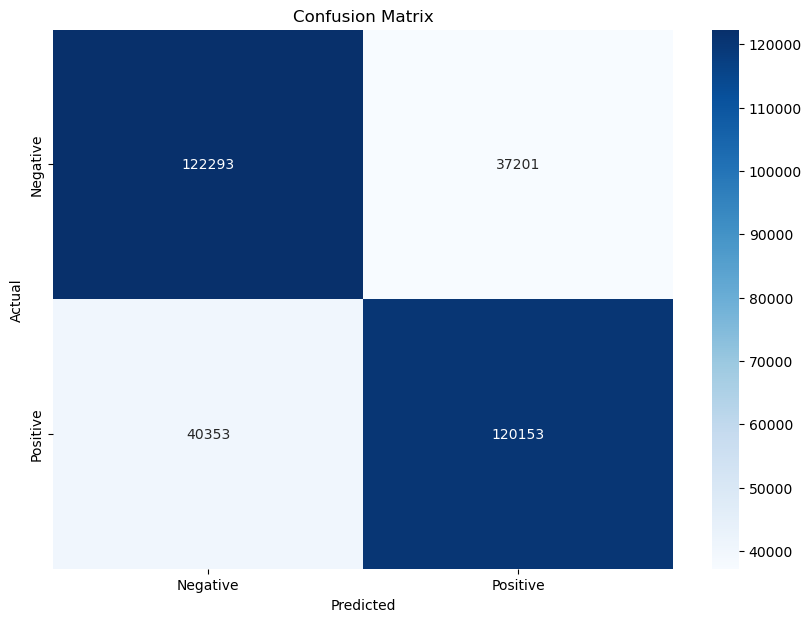

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Bagian ini membuat visualisasi confusion matrix menggunakan seaborn untuk memudahkan interpretasi hasil prediksi model.

## Fungsi untuk Prediksi Sentimen

In [10]:
def predict_sentiment(text):
    # Pra-pemrosesan teks
    processed_text = preprocess_text(text)
    # Ekstraksi fitur
    text_vect = vectorizer.transform([processed_text])
    # Prediksi sentimen
    prediction = model.predict(text_vect)
    # Mengembalikan hasil prediksi
    return 'Positive' if prediction[0] == 1 else 'Negative'


In [11]:
examples = [
    "I love this product! It's amazing.",
    "This is the worst service I have ever experienced.",
    "Not bad, but could be better.",
    "Absolutely fantastic! Highly recommend.",
    "I am very disappointed with this purchase."
]

for example in examples:
    print(f"Text: {example}\nSentiment: {predict_sentiment(example)}\n")


Text: I love this product! It's amazing.
Sentiment: Positive

Text: This is the worst service I have ever experienced.
Sentiment: Negative

Text: Not bad, but could be better.
Sentiment: Negative

Text: Absolutely fantastic! Highly recommend.
Sentiment: Positive

Text: I am very disappointed with this purchase.
Sentiment: Negative

